In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tyukhtet
Processing Record 2 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | camacha
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | goderich
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kasama
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | martapura
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | parry sound
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | constantine
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | aleppo
Processing Record 22 of Set 1 | karratha
Processing Rec

Processing Record 39 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 40 of Set 4 | pushkinskiye gory
Processing Record 41 of Set 4 | povenets
Processing Record 42 of Set 4 | giresun
Processing Record 43 of Set 4 | eunice
Processing Record 44 of Set 4 | joshimath
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | moron
Processing Record 47 of Set 4 | paraiso
Processing Record 48 of Set 4 | karlskoga
Processing Record 49 of Set 4 | portland
Processing Record 50 of Set 4 | pitimbu
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | sola
Processing Record 4 of Set 5 | illapel
Processing Record 5 of Set 5 | severnyy
Processing Record 6 of Set 5 | athabasca
Processing Record 7 of Set 5 | juba
Processing Record 8 of Set 5 | hebertville
City not found. Skipping...
Processing Record 9 of Set 5 | airai
Processing Record 10 of Set 5 | southbridge
Processing Record 11 of Set 5 | vredendal
Pr

Processing Record 29 of Set 8 | fare
Processing Record 30 of Set 8 | quatre cocos
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | bonoua
Processing Record 33 of Set 8 | steinbach
Processing Record 34 of Set 8 | kilindoni
Processing Record 35 of Set 8 | kralendijk
Processing Record 36 of Set 8 | iqaluit
Processing Record 37 of Set 8 | visby
Processing Record 38 of Set 8 | wuda
Processing Record 39 of Set 8 | san patricio
Processing Record 40 of Set 8 | xai-xai
Processing Record 41 of Set 8 | turka
Processing Record 42 of Set 8 | friendly
Processing Record 43 of Set 8 | gazimurskiy zavod
Processing Record 44 of Set 8 | borovoy
Processing Record 45 of Set 8 | agde
Processing Record 46 of Set 8 | porbandar
Processing Record 47 of Set 8 | poum
Processing Record 48 of Set 8 | koshurnikovo
Processing Record 49 of Set 8 | kuching
Processing Record 50 of Set 8 | moerai
Processing Record 1 of Set 9 | inderborskiy
City not found. Skipping...
Processing Record 2 of Set 9 | ro

Processing Record 19 of Set 12 | nouadhibou
Processing Record 20 of Set 12 | ermoupolis
Processing Record 21 of Set 12 | samarai
Processing Record 22 of Set 12 | jaranwala
Processing Record 23 of Set 12 | pousat
City not found. Skipping...
Processing Record 24 of Set 12 | kloulklubed
Processing Record 25 of Set 12 | birjand
Processing Record 26 of Set 12 | mpika
Processing Record 27 of Set 12 | college
Processing Record 28 of Set 12 | huarmey
Processing Record 29 of Set 12 | dasoguz
Processing Record 30 of Set 12 | broken hill
Processing Record 31 of Set 12 | kultuk
Processing Record 32 of Set 12 | guerrero negro
Processing Record 33 of Set 12 | buraydah
Processing Record 34 of Set 12 | olafsvik
Processing Record 35 of Set 12 | bin qirdan
Processing Record 36 of Set 12 | jimma
Processing Record 37 of Set 12 | souris
Processing Record 38 of Set 12 | komsomolskiy
Processing Record 39 of Set 12 | ossora
Processing Record 40 of Set 12 | marinette
Processing Record 41 of Set 12 | satwas
Pro

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tyukhtet,56.5389,89.3011,20.30,91,100,16.78,RU,2021-11-27 22:28:00
1,Tarakan,3.3000,117.6333,77.45,88,100,8.19,ID,2021-11-27 22:28:00
2,Camacha,33.0833,-16.3333,59.76,82,40,14.97,PT,2021-11-27 22:28:00
3,Severo-Kurilsk,50.6789,156.1250,28.47,65,77,28.45,RU,2021-11-27 22:25:33
4,Goderich,43.7501,-81.7165,28.72,86,100,6.91,CA,2021-11-27 22:28:00
5,Vaini,-21.2000,-175.2000,84.36,84,75,8.05,TO,2021-11-27 22:28:01
6,Ushuaia,-54.8000,-68.3000,53.26,35,0,10.36,AR,2021-11-27 22:28:01
7,Mataura,-46.1927,168.8643,59.38,46,59,1.74,NZ,2021-11-27 22:24:14
8,Kasama,-10.2129,31.1808,61.47,96,77,4.18,ZM,2021-11-27 22:28:01
9,Cape Town,-33.9258,18.4232,63.01,94,75,18.41,ZA,2021-11-27 22:27:03


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tyukhtet,RU,2021-11-27 22:28:00,56.5389,89.3011,20.30,91,100,16.78
1,Tarakan,ID,2021-11-27 22:28:00,3.3000,117.6333,77.45,88,100,8.19
2,Camacha,PT,2021-11-27 22:28:00,33.0833,-16.3333,59.76,82,40,14.97
3,Severo-Kurilsk,RU,2021-11-27 22:25:33,50.6789,156.1250,28.47,65,77,28.45
4,Goderich,CA,2021-11-27 22:28:00,43.7501,-81.7165,28.72,86,100,6.91
...,...,...,...,...,...,...,...,...,...
579,Sinjar,IQ,2021-11-27 22:42:29,36.3209,41.8754,55.87,57,98,1.81
580,Riacho De Santana,BR,2021-11-27 22:42:29,-13.6092,-42.9389,70.50,90,99,1.25
581,Along,IN,2021-11-27 22:42:29,28.1667,94.7667,51.19,68,0,1.77
582,Meadow Lake,US,2021-11-27 22:42:29,34.8014,-106.5436,65.17,21,1,3.15


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

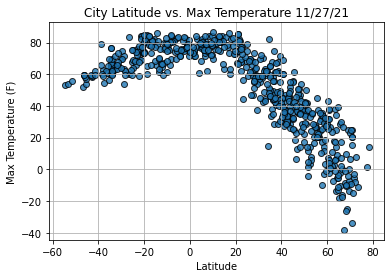

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

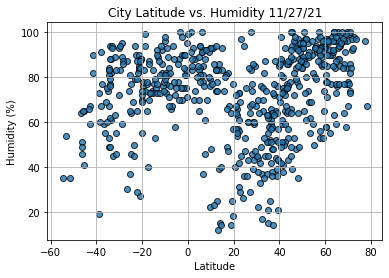

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

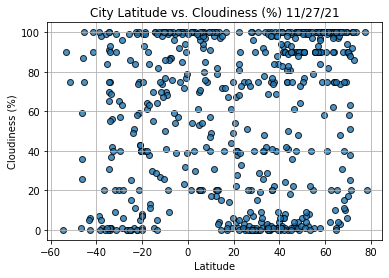

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

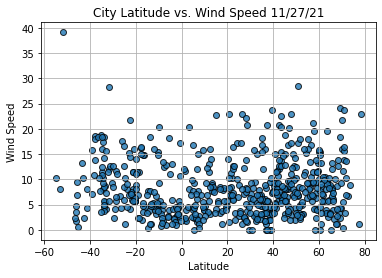

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()